In [123]:
import pandas as pd
import matplotlib.pyplot as plt

### 缺失值处理

In [34]:
# 缺失值nan
# 判断缺失值是否存在
movie=pd.read_csv("./IMDB/IMDB-Movie-Data.csv")

In [35]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [131]:
import numpy as np

In [37]:
np.any(pd.isnull(movie))

True

In [38]:
# 如果为false，证明有缺失值
np.all(pd.notnull(movie))

False

In [39]:
# 使用pd自己的方法来判断
pd.isnull(movie).any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

In [40]:
pd.notnull(movie).all()

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool

In [41]:
# 缺失值处理
# 1）删除含有缺失值的样本
data1=movie.dropna()


In [42]:
pd.notnull(data1).all()

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

In [43]:
# 2) 替换
movie["Revenue (Millions)"].fillna(movie["Revenue (Millions)"].mean(),inplace=True)
movie["Metascore"].fillna(movie["Metascore"].mean(),inplace=True)

In [44]:
pd.notnull(movie).all()  # 都为True意味着不存在缺失值

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

In [45]:
# 不是缺失值，有默认标记的处理方式
# 先将特殊标记替换成np.nan
# 然后按照上面的步骤进行处理

In [46]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data=pd.read_csv(path)
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [47]:
# 1) 替换
data_new=data.replace(to_replace="?",value=np.nan)
data_new.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [48]:
# 删除缺失值
data_new.dropna(inplace=True)

### 数据离散化

In [49]:
# 准备数据
data = pd.Series([165,174,160,180,159,163,192,184], index=['No1:165', 'No2:174','No3:160', 'No4:180', 'No5:159', 'No6:163', 'No7:192', 'No8:184']) 

In [50]:
data

No1:165    165
No2:174    174
No3:160    160
No4:180    180
No5:159    159
No6:163    163
No7:192    192
No8:184    184
dtype: int64

In [51]:
# 分组
# 自动分组
sr=pd.qcut(data,3)

In [52]:
sr

No1:165      (163.667, 178.0]
No2:174      (163.667, 178.0]
No3:160    (158.999, 163.667]
No4:180        (178.0, 192.0]
No5:159    (158.999, 163.667]
No6:163    (158.999, 163.667]
No7:192        (178.0, 192.0]
No8:184        (178.0, 192.0]
dtype: category
Categories (3, interval[float64]): [(158.999, 163.667] < (163.667, 178.0] < (178.0, 192.0]]

In [53]:
# 转换成one-hot编码
pd.get_dummies(sr,prefix="heigh")

,"heigh_(158.999, 163.667]","heigh_(163.667, 178.0]","heigh_(178.0, 192.0]"
No1:165,0,1,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,0,1
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


In [54]:
# 自定义分组
bins=[150,165,180,195]
sr=pd.cut(data,bins)
sr.value_counts()

(150, 165]    4
(180, 195]    2
(165, 180]    2
dtype: int64

#### 案例 股票涨跌幅分组

In [55]:
# 1）读取数据
stock = pd.read_csv("./stock_day/stock_day.csv")

In [56]:
p_change=stock["p_change"]

In [57]:
# 分组
sr=pd.qcut(p_change,10)

In [58]:
sr.value_counts()

(5.27, 10.03]                    65
(0.26, 0.94]                     65
(-0.462, 0.26]                   65
(-10.030999999999999, -4.836]    65
(2.938, 5.27]                    64
(1.738, 2.938]                   64
(-1.352, -0.462]                 64
(-2.444, -1.352]                 64
(-4.836, -2.444]                 64
(0.94, 1.738]                    63
Name: p_change, dtype: int64

In [59]:
# 离散化
pd.get_dummies(sr,prefix="涨跌幅")

,"涨跌幅_(-10.030999999999999, -4.836]","涨跌幅_(-4.836, -2.444]","涨跌幅_(-2.444, -1.352]","涨跌幅_(-1.352, -0.462]","涨跌幅_(-0.462, 0.26]","涨跌幅_(0.26, 0.94]","涨跌幅_(0.94, 1.738]","涨跌幅_(1.738, 2.938]","涨跌幅_(2.938, 5.27]","涨跌幅_(5.27, 10.03]"
2018-02-27,0,0,0,0,0,0,0,1,0,0
2018-02-26,0,0,0,0,0,0,0,0,1,0
2018-02-23,0,0,0,0,0,0,0,1,0,0
2018-02-22,0,0,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,0,0,0,1,0,0
2018-02-13,0,0,0,0,0,0,1,0,0,0
2018-02-12,0,0,0,0,0,0,0,0,1,0
2018-02-09,1,0,0,0,0,0,0,0,0,0
2018-02-08,0,0,0,0,0,1,0,0,0,0
2018-02-07,0,0,1,0,0,0,0,0,0,0


In [60]:
# 自定义分组
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
sr=pd.cut(p_change,bins)

In [61]:
sr.value_counts()

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(7, 100]       35
(5, 7]         35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64

In [62]:
# ont-hot
stock_change=pd.get_dummies(sr,prefix="rise")
stock_change

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0
2018-02-13,0,0,0,0,1,0,0,0
2018-02-12,0,0,0,0,0,1,0,0
2018-02-09,0,1,0,0,0,0,0,0
2018-02-08,0,0,0,0,1,0,0,0
2018-02-07,0,0,0,1,0,0,0,0


### 合并

In [63]:
# 处理好的 one-hot编码与元数据合并
stock_change.head()

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0


In [64]:
pd.concat([stock,stock_change],axis=1)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,0,0,0,0,1,0,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,0,0,0,0,0,1,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,0,0,0,0,1,0,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,0,0,0,0,1,0,0,0
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,...,65161.68,0.77,0,0,0,0,1,0,0,0
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,...,68686.33,0.81,0,0,0,0,0,1,0,0
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,...,70552.47,1.36,0,1,0,0,0,0,0,0
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,...,73852.45,0.68,0,0,0,0,1,0,0,0
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,...,74925.33,1.35,0,0,0,1,0,0,0,0


In [66]:
# pd.concat([stock,stock_change],axis=0)

In [67]:
# pd.merge实现合并
# inner(默认) outer left right

In [68]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [69]:
pd.merge(left,right,how="inner",on=["key1","key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


### 交叉表与透视表

In [70]:
# 交叉表(crosstab) 实现

In [71]:
# 星期数据以及涨跌幅是好是坏数据
# pd.crosstab(星期数据列，涨跌幅数据列)
stock

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35


In [72]:
# 日期类型
date=pd.to_datetime(stock.index)

In [74]:
date.weekday

Int64Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
            ...
            4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
           dtype='int64', length=643)

In [75]:
stock["week"]=date.weekday

In [77]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2


In [81]:
# 准备涨跌幅数据列
stock["pona"]=np.where(stock["p_change"]>0,1,0)

In [79]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,poa
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1


In [85]:
# 交叉表
data2=pd.crosstab(stock["week"],stock["pona"])

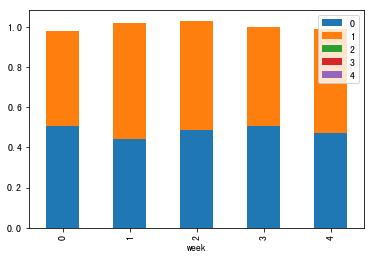

In [88]:
data2.div(data2.sum(axis=1)).plot(kind="bar",stacked=True)

In [89]:
# 透视表pivot_table
# 更加简单方便
stock.pivot_table(["pona"],index=["week"])

,pona
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


### 分组与聚合

In [90]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})


In [91]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [95]:
# 进行分组，对颜色分组，price1进行聚合
# 使用dataFrame进行分组
col.groupby(by="color")["price1"].max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

In [96]:
# 使用sr
col["price1"].groupby(col["color"]).max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

In [97]:
## 星巴克零售店铺数据案例

In [102]:
# 1、准备数据
starbucks = pd.read_csv("directory.csv")

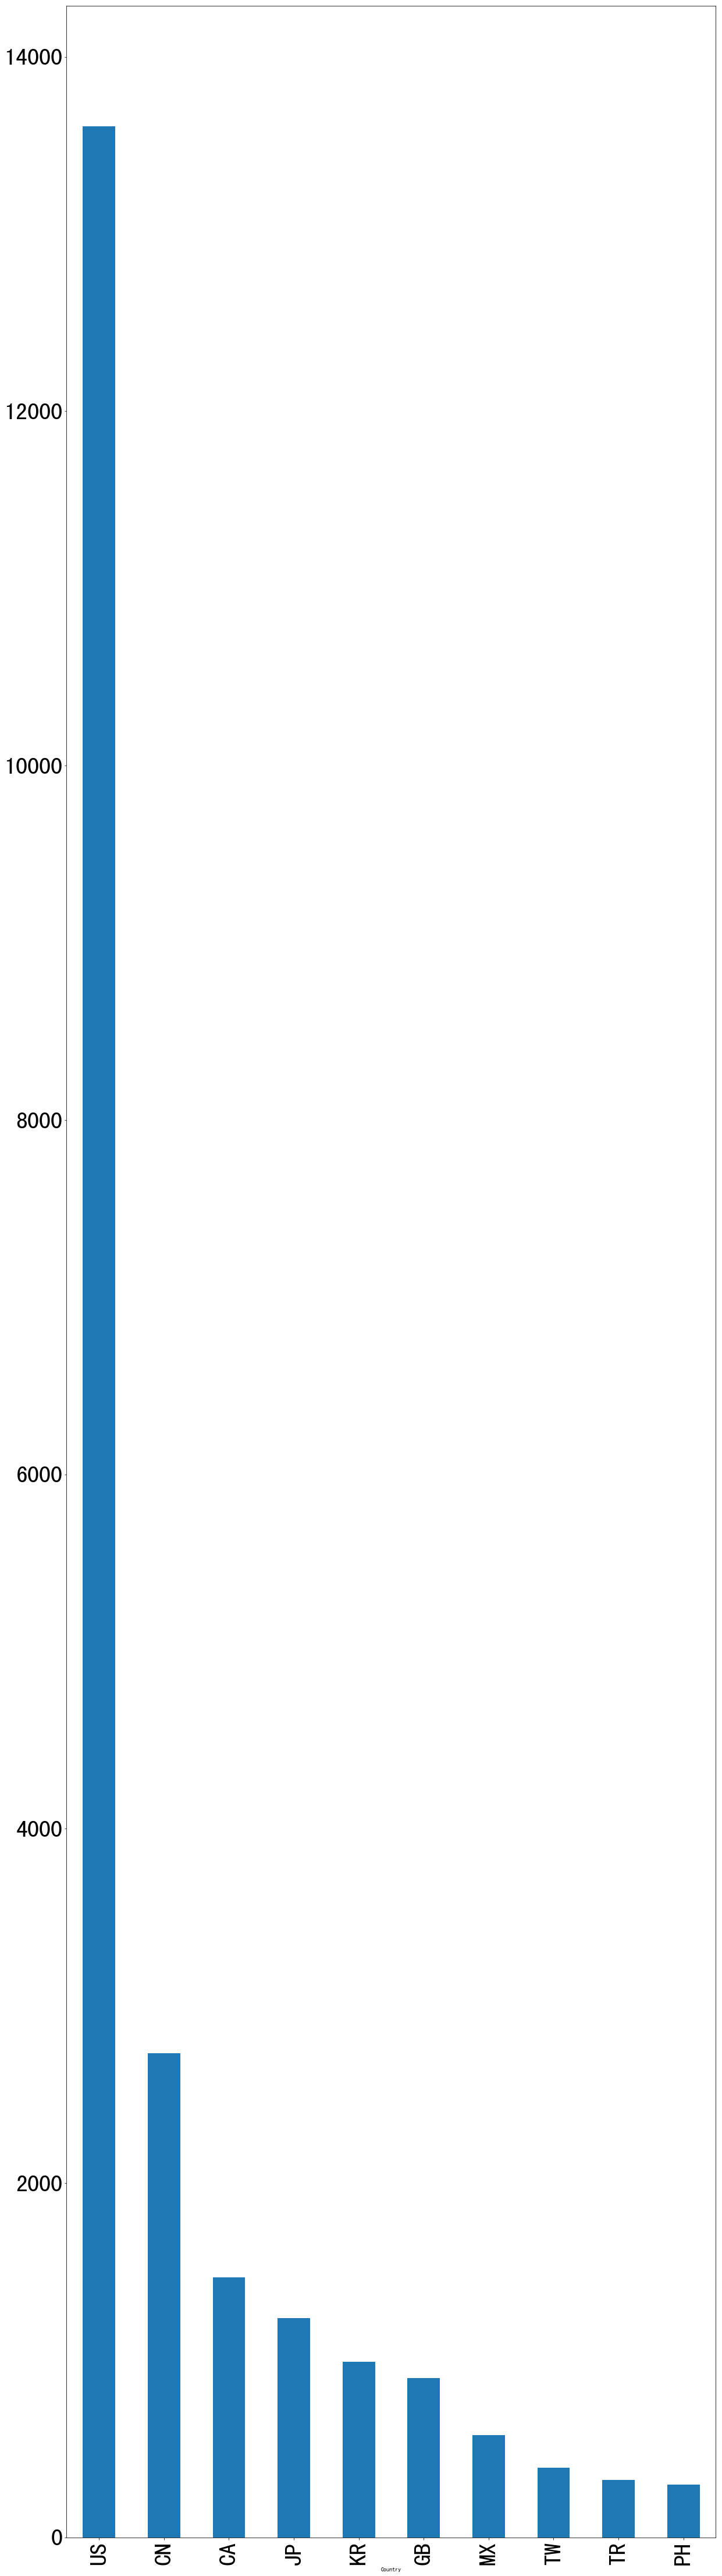

In [108]:
# 按照国家分组，求出每个国家的星巴克零售店数量
starbucks.groupby("Country").count()["Brand"].sort_values(ascending=False)[:10].plot(kind="bar",figsize=(20,80),fontsize=40)

In [113]:
# 假设我们加入省市一起进行分组
starbucks.groupby(by=["Country","State/Province"]).count()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
        RK                  3             3           3               3   
        SH                  6             6           6               6   
        UQ                  1             1           1               1   
AR      B                  21            21          21              21   
        C                  73            73          73              73   
        M                   5             5           5               5   
        S                   3             3           3               3   
        X                   6             6           6               6   
AT      3                   1             1           1               1   
        5                   3             3           3               3   
        9                  14            14          14              14   
AU      NSW                 9             9           9               9   
        QLD                 8             8           8               8   
        VIC                 5             5           5               5   
AW      AW                  3             3           3               3   
AZ      BA                  3             3           3               3   
        SAB                 1             1           1               1   
BE      BE                  4             4           4               4   
        VAN                 1             1           1               1   
        VBR                 2             2           2               2   
        VLG                10            10          10              10   
        WAL                 2             2           2               2   
BG      2                   1             1           1               1   
        23                  4             4           4               4   
BH      13                 16            16          16              16   
...                       ...           ...         ...             ...   
US      MO                188           188         188             188   
        MS                 32            32          32              32   
        MT                 36            36          36              36   
        NC                338           338         338             338   
        ND                 13            13          13              13   
        NE                 58            58          58              58   
        NH                 29            29          29              29   
        NJ                261           261         261             261   
        NM                 76            76          76              76   
        NV                253           253         253             253   
        NY                645           645         645             645   
        OH                378           378         378             378   
        OK                 79            79          79              79   
        OR                359           359         359             359   
        PA                357           357         357             357   
        RI                 27            27          27              27   
        SC                131           131         131             131   
        SD                 25            25          25              25   
        TN                180           180         180             180   
        TX               1042          1042        1042            1042   
        UT                101           101      

## 综合案例

In [114]:
# 1、准备数据
movie = pd.read_csv("./IMDB/IMDB-Movie-Data.csv")

In [117]:
# 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？
# 评分的平均分
movie["Rating"].mean()

6.723199999999999

In [119]:
# 导演人数
np.unique(movie["Director"]).size

644

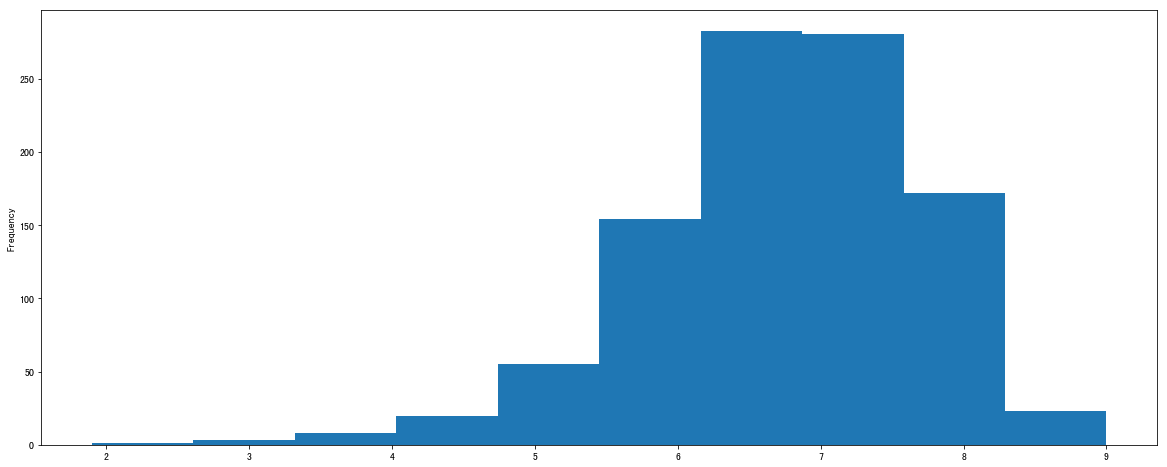

In [121]:
# 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？
movie["Rating"].plot(kind="hist",figsize=(20,8))

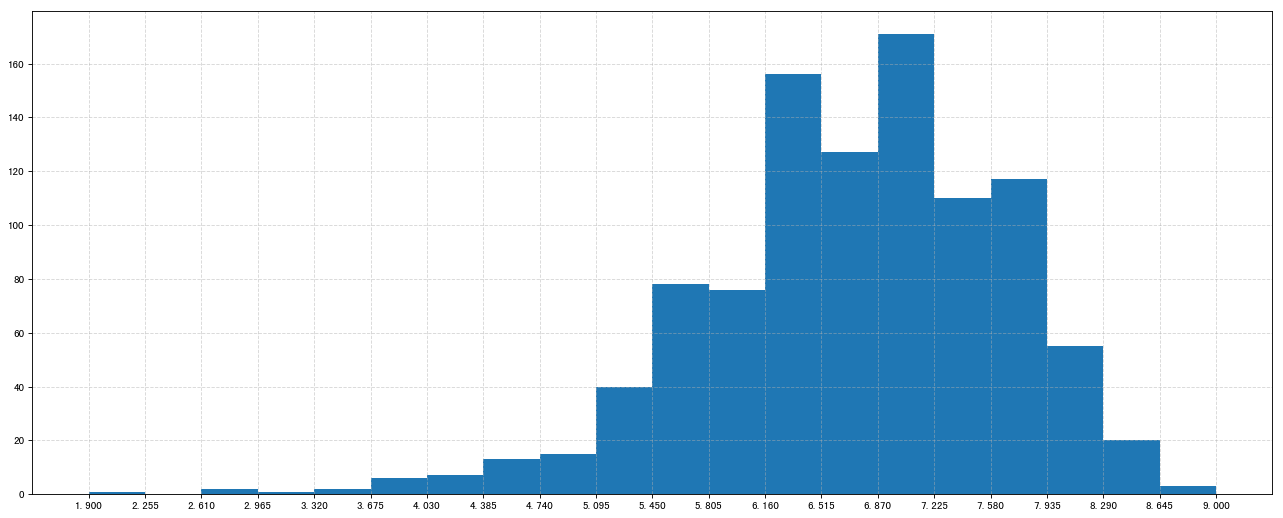

In [139]:
plt.figure(figsize=(20,8),dpi=80)
plt.hist(movie["Rating"],20)
plt.xticks(np.linspace(movie["Rating"].min(), movie["Rating"].max(), 21))
# plt.xticks(np.linspace(movie["Rating"].min(), movie["Rating"].max(), 21))

plt.grid(linestyle="--", alpha=0.5)
plt.show()

In [140]:
# 对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？


In [142]:
# 先统计电影类别又有哪些
movie_genre=[i.split(",") for i in movie["Genre"]]

In [147]:
movie_class=np.unique([j for i in movie_genre for j in i])

In [148]:
len(movie_class)

20

In [152]:
# 统计每个类别有几个电影
count=pd.DataFrame(np.zeros(shape=[1000,20],dtype="int32"),columns=movie_class)
count.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [153]:
# 计数遍历
for i in range(1000):
    count.ix[i,movie_genre[i]]=1

/home/smaugadg/.virtualenvs/~AI-python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


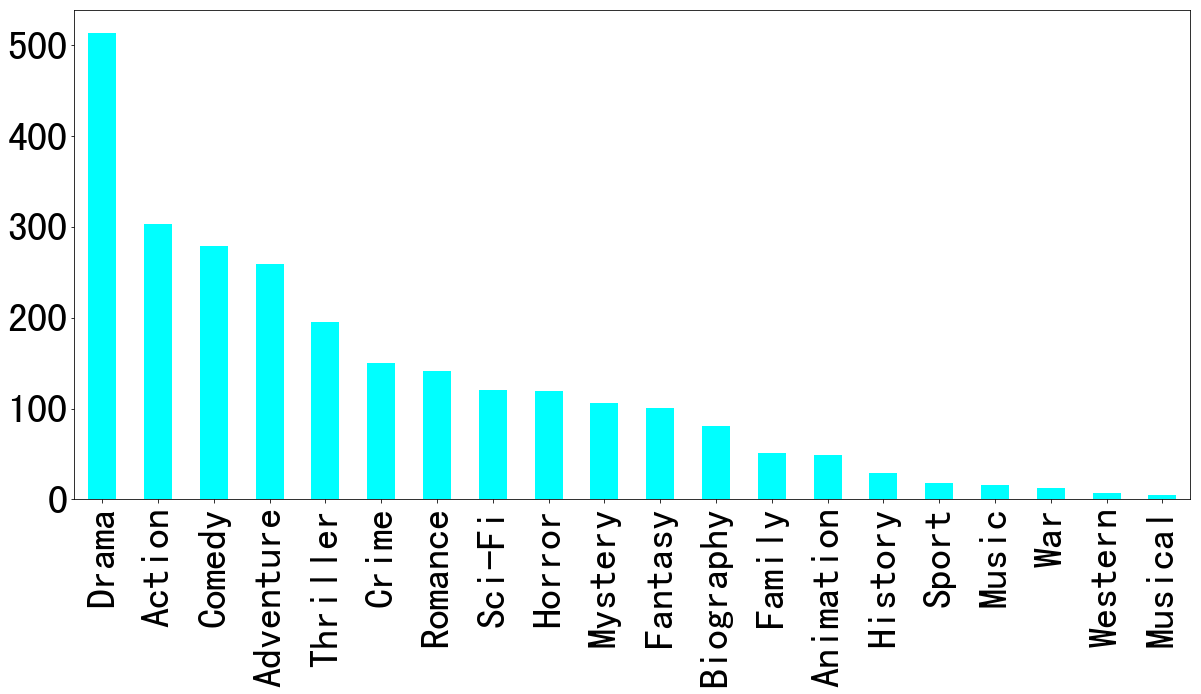

In [155]:
count.sum(axis=0).sort_values(ascending=False).plot(kind="bar", figsize=(20, 9), fontsize=40, colormap="cool")